<br>
<h1 style = "font-size:35px; font-family:cursive ; font-weight : bold; background-color:#FFBFBF;color : #C10000; text-align: center; border-radius: 10px 100px;"> 🏥 Pneumonia Detection from scratch </h1>
<br>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
from IPython.display import HTML
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 2.5%;
	color: #00018D;
	box-shadow: 
		inset 0 0 0 1px rgba(97,0,45, 1), 
		inset 0 0 5px rgba(53,86,129, 1),
		inset -285px 0 35px #F2D8FF;
	border-radius: 0 10px 0 15px;
	background: #FFD8B2
    
}
</style>
""")

# What is Pneumonia?

<p style="font-size:15px;color:#1C37A6;font-weight:600;">Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.<br>
Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.</p>

![](https://www.drugs.com/health-guide/images/022dc126-fc5d-4e54-9a78-75f2c9ea4bb6.jpg)

# Introduction to Pneumonia Dataset:

<p style="font-size:15px;color:#1C37A6;font-weight:600;">The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).<br>
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.<br>
For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.</p>

# What is CNN?

<p style="font-size:15px;color:#1C37A6;font-weight:600;">A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm that can take in an input image, assign importance (learnable weights and biases) to various aspects/objects of the image, and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods, filters are hand-engineered, with enough training, ConvNets can learn these filters/characteristics.</p>

![](https://cezannec.github.io/assets/cnn_intro/CNN_ex.png)

# Breaking down the CNN:

<p style="font-size:25px;color:#188100;font-weight:Bold;">◇ Convolution Layer:</p>
<p style="font-size:15px;color:#1C37A6;font-weight:600;">The convolution layer is the core building block of the CNN. It carries the main portion of the network’s computational load.<br>
This layer performs a dot product between two matrices, where one matrix is the set of learnable parameters otherwise known as a kernel, and the other matrix is the restricted portion of the receptive field. The kernel is spatially smaller than an image but is more in-depth. This means that, if the image is composed of three (RGB) channels, the kernel height and width will be spatially small, but the depth extends up to all three channels.<br>
After multiplication, the result obtained is called a Feature map, as shown below.</p>


![](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

<p style="font-size:20px;color:#00817E;font-weight:600;">▸ Stride:</p>
<p style="font-size:15px;color:#1C37A6;font-weight:600;">Stride is the number of pixels shifts over the input matrix. When the stride is 1, then we move the filters to 1 pixel at a time.</p>


<p style="font-size:20px;color:#00817E;font-weight:600;">▸ Padding:</p>
<p style="font-size:15px;color:#1C37A6;font-weight:600;">Sometimes, the filter does not fit perfectly fit the input image. So to avoid information loss, we have two options:<br>
1) Pad the picture with zeros (zero-padding) so that it fits.<br>
2) Drop the part of the image where the filter did not fit. This is called valid padding, which keeps only a valid part of the image</p>


![](https://miro.medium.com/max/2126/1*W2D564Gkad9lj3_6t9I2PA@2x.gif)

<p style="font-size:25px;color:#188100;font-weight:Bold;">◇ Pooling Layer:</p>
<p style="font-size:15px;color:#1C37A6;font-weight:600;">The Pooling layer replaces the output of the network at certain locations by deriving a summary statistic of the nearby outputs. This helps in reducing the spatial size of the representation, which decreases the required amount of computation and weights. The pooling operation is processed on every slice of the representation individually.<br>
There are several pooling functions such as the average of the rectangular neighborhood, L2 norm of the rectangular neighborhood, and a weighted average based on the distance from the central pixel. However, the most popular process is max pooling, which reports the maximum output from the neighborhood.</p>


![](https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif)

<p style="font-size:25px;color:#188100;font-weight:Bold;">◇ Fully Connected Layer:</p>
<p style="font-size:15px;color:#1C37A6;font-weight:600;">The layer we call as FC layer, we flattened our matrix into the vector and feed it into a fully connected layer like a neural network.
</p>


![](https://miro.medium.com/max/1896/1*qsbsCVyu376kqdnNcdxmmw.png)

<p style="font-size:20px;color:#1C37A6;font-weight:600;">Let's apply what we have learned so far.</p>

# ✔ Importing Libraries:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
import cv2
import random
import os
import glob
from tqdm.notebook import tqdm
import albumentations as A
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout , BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

# 🚚 Loading Data:

In [4]:
train_data = glob.glob('../input/chest-xray-pneumonia/chest_xray/train/**/*.jpeg')
test_data = glob.glob('../input/chest-xray-pneumonia/chest_xray/test/**/*.jpeg')
val_data = glob.glob('../input/chest-xray-pneumonia/chest_xray/val/**/*.jpeg')

print("〰"*20)
print(f"Training Set has: {len(train_data)} images")
print(f"Testing Set has: {len(test_data)} images")
print(f"Validation Set has: {len(val_data)} images")
print("〰"*20)

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰
Training Set has: 5216 images
Testing Set has: 624 images
Validation Set has: 16 images
〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰


In [5]:
DIR = "../input/chest-xray-pneumonia/chest_xray/"
sets = ["train", "test", "val"]
all_pneumonia = []
all_normal = []

for cat in sets:
    path = os.path.join(DIR, cat)
    norm = glob.glob(os.path.join(path, "NORMAL/*.jpeg"))
    pneu = glob.glob(os.path.join(path, "PNEUMONIA/*.jpeg"))
    all_normal.extend(norm)
    all_pneumonia.extend(pneu)
print("〰"*20)
print(f"Total Pneumonia Images: {len(all_pneumonia)}")
print(f"Total Normal Images: {len(all_normal)}")
print("〰"*20)

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰
Total Pneumonia Images: 4273
Total Normal Images: 1583
〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰


# 🔍 Basic Data Exploration:

In [6]:
## Plotly chart for Class distribution
labels = ["Normal",'Pneumonia ']
values = [len(all_normal), len(all_pneumonia)]
colors = ['green', 'pink']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.5)])
fig.update_traces(hoverinfo='value', textinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Image Category Distribution",
                  titlefont={'size': 30},      
                  )
iplot(fig)

<p style="font-size:15px;color:#1C37A6;font-weight:600;">Shuffling the images randomly.</p>

In [7]:
random.shuffle(all_normal)
random.shuffle(all_pneumonia)
images = all_normal[:50] + all_pneumonia[:50]

<p style="font-size:15px;color:#1C37A6;font-weight:600;">Viewing the images in X-ray</p>

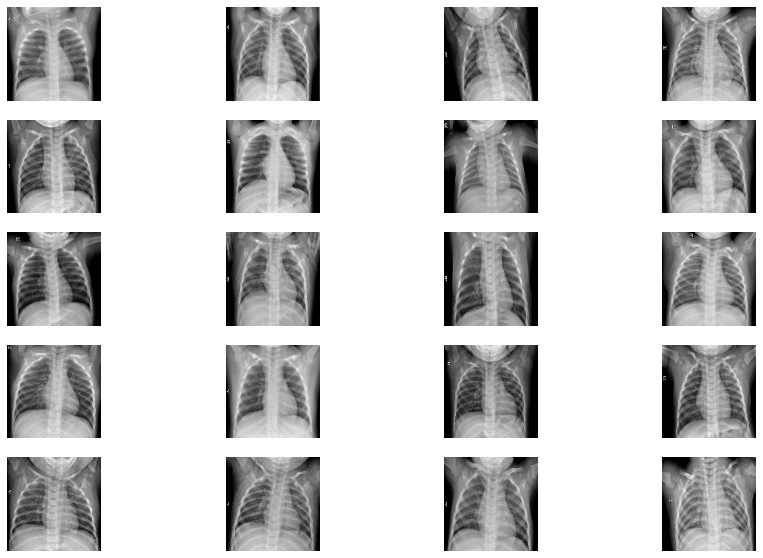

In [8]:

fig=plt.figure(figsize=(15, 10))
columns = 4; rows = 5
for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (128, 128))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis(False)

<p style="font-size:15px;color:#1C37A6;font-weight:600;">First, we convert the images to greyscale and then apply Gaussian blur to them.</p>

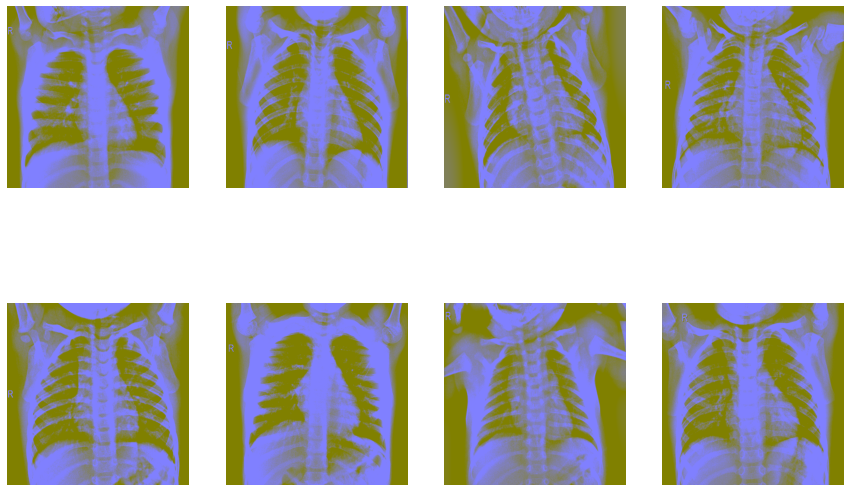

In [9]:
fig=plt.figure(figsize=(15, 10))
columns = 4; rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis(False)

<p style="font-size:15px;color:#1C37A6;font-weight:600;">Now, let’s look into the pixel distributions. We’ll use the Fourier method for this.</p>

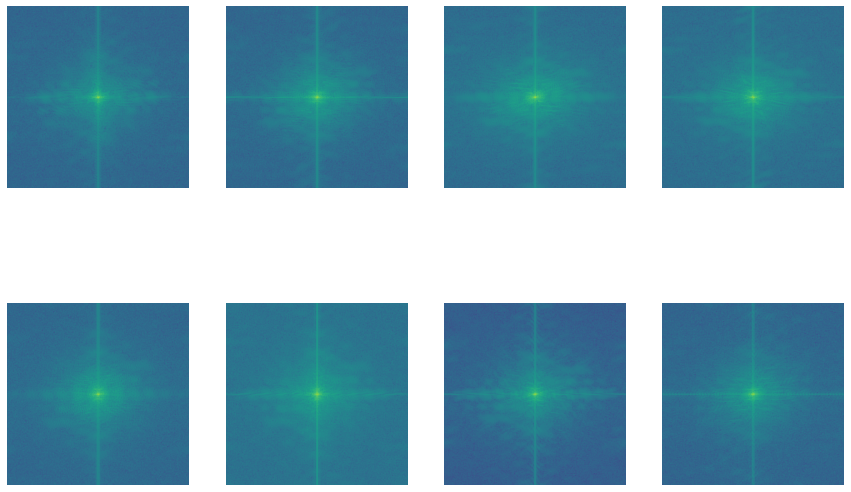

In [10]:
fig=plt.figure(figsize=(15, 10))
columns = 4; rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    fig.add_subplot(rows, columns, i)
    plt.imshow(magnitude_spectrum)
    plt.axis(False)

<p style="font-size:15px;color:#1C37A6;font-weight:600;">All these images might look like a bunch of green dots on a blue background, but that’s not all. These images are basically magnitude spectrum which tells us where the majority of the growth is.</p>


<p style="font-size:15px;color:#1C37A6;font-weight:600;">Image Erosion:</p>


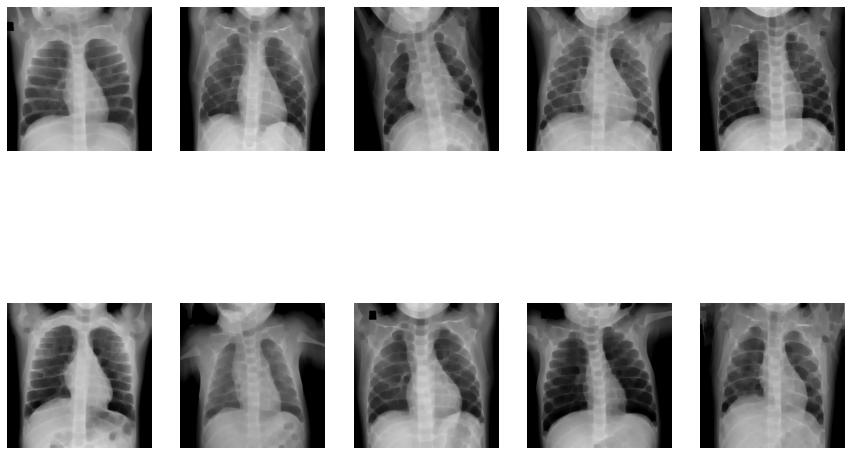

In [11]:
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv2.erode(img, kernel, iterations=3)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_erosion)
    plt.axis(False)

<p style="font-size:15px;color:#1C37A6;font-weight:600;">Dilation of Images</p>


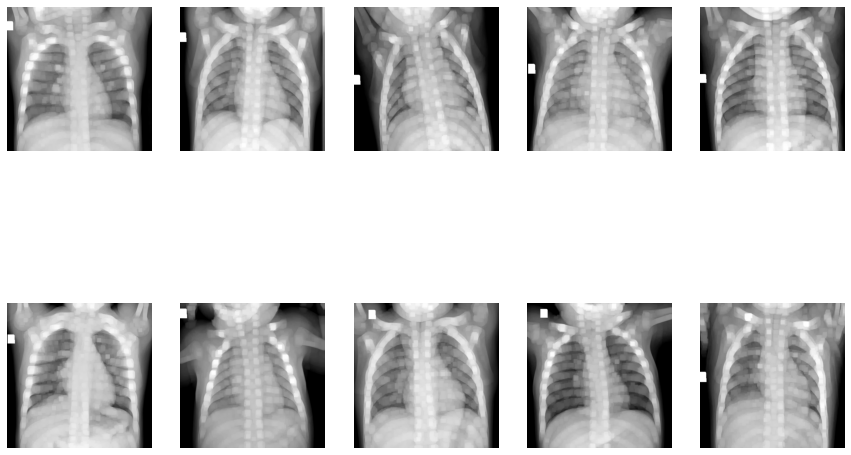

In [12]:
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv2.dilate(img, kernel, iterations=3)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img_erosion)
    plt.axis(False)


<p style="font-size:15px;color:#1C37A6;font-weight:600;">Now let’s use OpenCV’s Canny Edge Detection:</p>


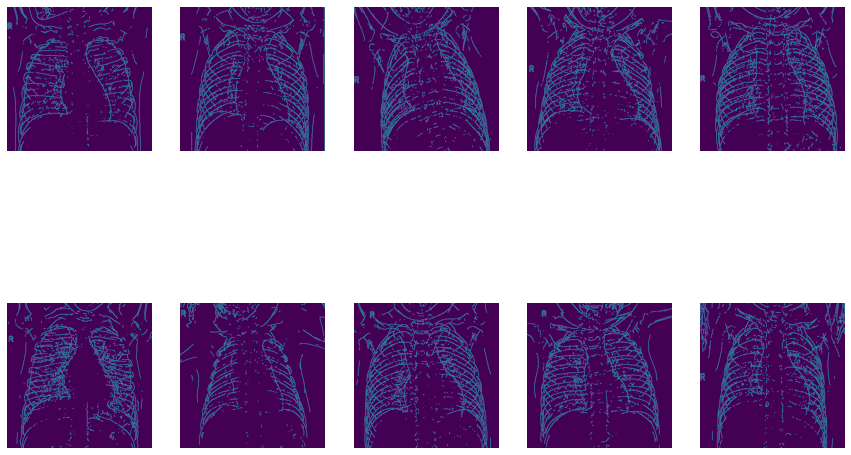

In [13]:
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 2
for i in range(1, columns*rows +1):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(img, 80, 100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(edges)
    plt.axis(False)

# 👨‍💻 Model Building:

<p style="font-size:15px;color:#1C37A6;font-weight:600;">First, we divide our data to create a training and validation set using the Keras Image DataGenerator.</p>


In [14]:
train_gen = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=0.3,
    zoom_range=0.4
)
val_gen = ImageDataGenerator(
    rescale=1/255.,
)

In [15]:
Train = train_gen.flow_from_directory(
    "../input/chest-xray-pneumonia/chest_xray/train",batch_size=16,
    target_size=(224, 224),#class_mode="binary" 
)
val = train_gen.flow_from_directory(
    "../input/chest-xray-pneumonia/chest_xray/test",batch_size=8,
    target_size=(224, 224),#class_mode="binary" 
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


<p style="font-size:15px;color:#1C37A6;font-weight:600;">Now it’s time to actually build the neural network architecture. Let’s start with the input layer (input1). So this layer basically takes all the image samples in our X data. Hence we need to ensure that the first layer accepts the exact same shape as the image size. <br>
Then, this input1 layer is connected to several convolution-pooling layer pairs before eventually being flattened and connected to dense layers. Notice that all hidden layers in the model are using the ReLU activation function due to the fact that ReLU is faster to compute compared to sigmoid, and thus, the training time required is shorter.
</p>


In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [17]:
## Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


<p style="font-size:15px;color:#1C37A6;font-weight:600;">Now it’s time to train the model! Here we are going to use fit_generator() instead of fit() because we are going to take the train data from the train_gen object.
</p>


In [18]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

history = model.fit_generator(Train,epochs=20,validation_data=val,steps_per_epoch=50,callbacks=[early_stopping_cb])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/20
50/50 [==============================] - 85s 2s/step - loss: 0.6798 - accuracy: 0.7213 - val_loss: 0.7586 - val_accuracy: 0.6891
Epoch 2/20
50/50 [==============================] - 81s 2s/step - loss: 0.4996 - accuracy: 0.7794 - val_loss: 0.6141 - val_accuracy: 0.7468
Epoch 3/20
50/50 [==============================] - 80s 2s/step - loss: 0.4610 - accuracy: 0.7469 - val_loss: 0.4928 - val_accuracy: 0.7869
Epoch 4/20
50/50 [==============================] - 81s 2s/step - loss: 0.3876 - accuracy: 0.8221 - val_loss: 0.6714 - val_accuracy: 0.6779
Epoch 5/20
50/50 [==============================] - 81s 2s/step - loss: 0.3337 - accuracy: 0.8345 - val_loss: 1.0323 - val_accuracy: 0.6763
Epoch 6/20
50/50 [==============================] - 80s 2s/step - loss: 0.3382 - accuracy: 0.8605 - val_loss: 0.5237 - val_accuracy: 0.7324
Epoch 7/20
50/50 [==============================] - 85s 2s/step - loss: 0.3051 - accuracy: 0.8575 - val_loss: 0.5121 - val_accuracy: 0.7821
Epoch 8/20
50/50 [==


<p style="font-size:15px;color:#1C37A6;font-weight:600;">Now, let’s visualize the performance of our model:
</p>


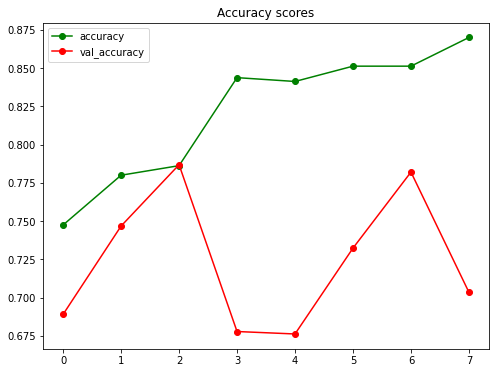

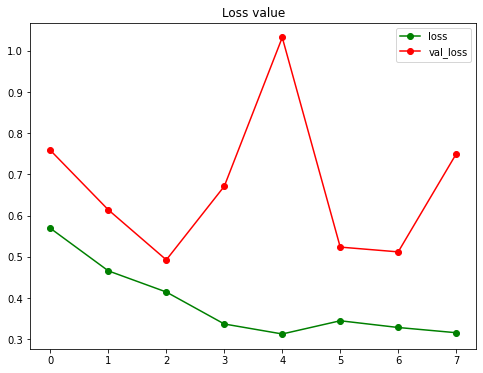

In [19]:
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(history.history['accuracy'],'go-')
plt.plot(history.history['val_accuracy'],'ro-')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()
plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(history.history['loss'],'go-')
plt.plot(history.history['val_loss'],'ro-')
plt.legend(['loss', 'val_loss'])
plt.show()

# Concept of Transfer Learning:

![](https://miro.medium.com/max/1920/1*Ww3AMxZeoiB84GVSRBr4Bw.png)


<p style="font-size:20px;color:#1C37A6;font-weight:600;">VGG16: 
</p>


![](https://www.researchgate.net/profile/Max-Ferguson/publication/322512435/figure/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png)

<p style="font-size:20px;color:#1C37A6;font-weight:600;">Let's apply the concept of Transfer Learning.</p>

In [20]:
base_model=VGG16(include_top=False, weights=None,input_shape=(224,224,3), pooling='avg',classes=2)

In [21]:
base_model.load_weights("../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [22]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
model=Sequential()
model.add(base_model)
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

## Freezing the layers
for layer in base_model.layers:
    layer.trainable=False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit_generator(Train,epochs=20,validation_data=val,steps_per_epoch=50,callbacks=[early_stopping_cb])

Epoch 1/20
50/50 [==============================] - 387s 8s/step - loss: 0.5125 - accuracy: 0.7581 - val_loss: 0.4742 - val_accuracy: 0.7404
Epoch 2/20
50/50 [==============================] - 393s 8s/step - loss: 0.3192 - accuracy: 0.8430 - val_loss: 0.4327 - val_accuracy: 0.7869
Epoch 3/20
50/50 [==============================] - 394s 8s/step - loss: 0.3099 - accuracy: 0.8748 - val_loss: 0.7861 - val_accuracy: 0.6603
Epoch 4/20
50/50 [==============================] - 388s 8s/step - loss: 0.3425 - accuracy: 0.8566 - val_loss: 0.3162 - val_accuracy: 0.8590
Epoch 5/20
50/50 [==============================] - 393s 8s/step - loss: 0.2528 - accuracy: 0.8892 - val_loss: 0.3112 - val_accuracy: 0.8590
Epoch 6/20
50/50 [==============================] - 387s 8s/step - loss: 0.2368 - accuracy: 0.9055 - val_loss: 0.3326 - val_accuracy: 0.8734
Epoch 7/20
50/50 [==============================] - 393s 8s/step - loss: 0.1955 - accuracy: 0.9371 - val_loss: 0.3239 - val_accuracy: 0.8702
Epoch 8/20
50


<p style="font-size:15px;color:#1C37A6;font-weight:600;">Now, let’s visualize the performance of our new model:
</p>


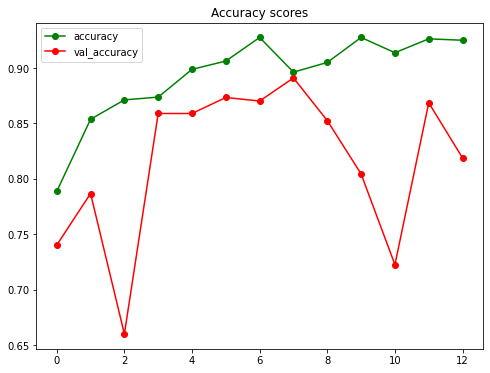

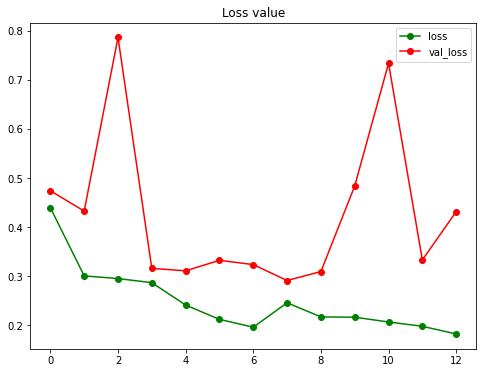

In [25]:
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(history.history['accuracy'],'go-')
plt.plot(history.history['val_accuracy'],'ro-')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()
plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(history.history['loss'],'go-')
plt.plot(history.history['val_loss'],'ro-')
plt.legend(['loss', 'val_loss'])
plt.show()

# Some Resources:

* https://keras.io/
* https://www.kaggle.com/rajmehra03/a-comprehensive-guide-to-transfer-learning/data
* https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939
* https://www.youtube.com/watch?v=iaSUYvmCekI
* https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
* https://www.kaggle.com/ashagutlapalli/computer-vision-101-with-opencv
* https://towardsdatascience.com/deep-learning-with-keras-cheat-sheet-2021-python-for-data-science-fba43636a9a1


![](https://i.pinimg.com/originals/7c/3b/63/7c3b63598dc8b65b93a9532d4228947b.gif)

In [26]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#5700AC','#eb3446','Nosifer','Smokum',35,10
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h4 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h4>"""%string))
    
    
dhtml('Do UPVOTE if you like my work ' )